
































# Data Acquisition

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import shapiro, probplot

In [ ]:
!pip -q install kagglehub
import kagglehub, os

path = kagglehub.dataset_download(
    "faresashraf1001/supermarket-sales"
)
print("Folder dataset:", path)
print("Daftar file:", os.listdir(path))

Using Colab cache for faster access to the 'supermarket-sales' dataset.
Folder dataset: /kaggle/input/supermarket-sales
Daftar file: ['SuperMarket Analysis.csv']


In [ ]:
df = pd.read_csv(f'{path}/SuperMarket Analysis.csv')

# Data Understanding

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df.shape

(1000, 17)

Hasil dari kode tersebut menunjukkan 1000 baris dan 17 kolom pada dataset.

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Kode diatas digunakan untuk mengetahui kolom apa saja yang terdapat dalam dataset.

In [ ]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


Kode diatas digunnakan untuk mengetahui tipe data apa yang terdapat dalam setiap kolom pada dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Kode diatas digunakan untuk ntuk menampilkan informasi ringkas tentang DataFrame, seperti jumlah baris, nama kolom, tipe data tiap kolom, serta jumlah nilai non-null pada setiap kolom.

In [ ]:
#Persentase Margin Kotor Ditetapkan pada 4,7619% sehingga tidak ada variasi nilai antar observasi.
df['gross margin percentage'] = df['gross margin percentage'].astype('object')

Kode tersebut mengubah tipe data kolom gross margin percentage dari numerik menjadi object.

In [ ]:
# Menampilkan hanya kolom dengan tipe data numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)

['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross income', 'Rating']


Kode diatas digunakan untuk menampilkan kolom numerik saja dalam dataframe.

In [ ]:
# Menampilkan hanya kolom dengan tipe data object (nominal)
obj_cols = df.select_dtypes(include='object').columns.tolist()
print(obj_cols)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment', 'gross margin percentage']


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


##### Berdasarkan hasil statistik deskriptif di atas, dapat diketahui bahwa :

##### Rata-rata harga satuan (unit price) sebesar 55.67, dengan kisaran antara 10.08 hingga 99.96, menandakan bahwa produk yang dijual memiliki variasi harga yang cukup besar. Rata-rata jumlah barang (quantity) adalah 5,51 unit, menunjukkan bahwa sebagian besar pembelian dilakukan dalam jumlah sedang. Untuk variabel keuangan seperti Tax 5%, Sales, cogs, dan gross income, semuanya memiliki pola yang mirip dengan rata-rata nilai penjualan sekitar Rp322,97 dan deviasi standar yang tinggi (±245,89), artinya nilai transaksi antarpenjualan cukup bervariasi. Nilai tertinggi pada Sales (1042,65) mengindikasikan adanya beberapa transaksi dengan nilai penjualan yang jauh lebih besar dari rata-rata.

##### Sedangkan untuk Rating pelanggan, nilai rata-ratanya 6,97 dengan rentang antara 4 hingga 10, menunjukkan bahwa sebagian besar pelanggan memberikan penilaian yang cukup baik terhadap produk atau layanan. Secara keseluruhan, data ini memperlihatkan bahwa penjualan memiliki variasi yang cukup luas, baik dari sisi harga maupun nilai transaksi, namun tetap berada dalam kisaran yang wajar.

In [ ]:
df.isna().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


##### Kode diatas menampilkan 0 pada semua kolom, artinya tidak ada nilai kosong (missing value) di dalam dataset.

# Data Preparation

###Missing Value

In [ ]:
print(df.isnull().sum().sum())

0


##### Kode diatas diketahui bahwa jumlah missing value atau data yang hilang adalah 0 pada seluruh kolom. Hal ini berarti dataset lengkap dan tidak terdapat nilai kosong

###Data Duplikat

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


##### Kode diatas menghasilkan False, artinya tidak ada data duplikat di dalam dataset.

### Cek bentuk distribusi data

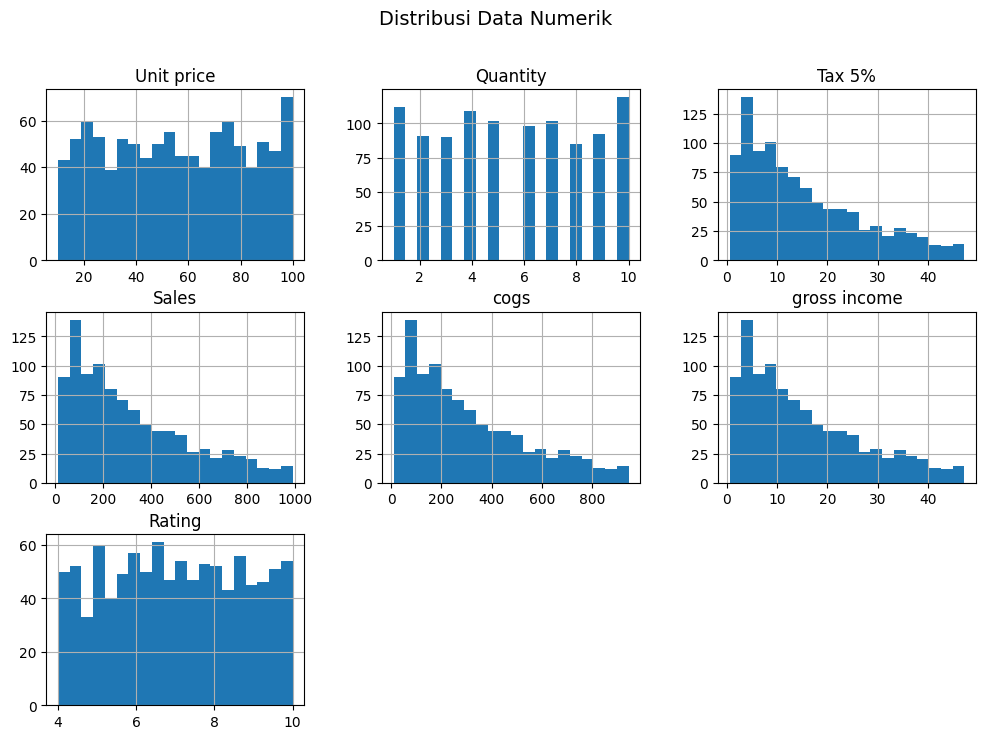

In [ ]:
# Histogram
df[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribusi Data Numerik", fontsize=14)
plt.show()

Berdasarkan visualisasi distribusi data numerik, dapat disimpulkan bahwa sebagian besar variabel keuangan seperti **Sales**, **COGS**, **gross income**, dan **Tax 5%** memiliki distribusi yang **condong ke kanan (right-skewed)**. Hal ini menunjukkan bahwa sebagian besar transaksi memiliki nilai yang relatif kecil, sementara hanya sedikit transaksi dengan nilai yang besar. Sementara itu, variabel **Unit price** dan **Rating** menunjukkan pola distribusi yang relatif **merata (uniform)**, menandakan bahwa nilai-nilai pada variabel tersebut tersebar cukup seimbang di seluruh rentang data. Variabel **Quantity** juga tampak terdistribusi secara merata pada kisaran 1 hingga 10.


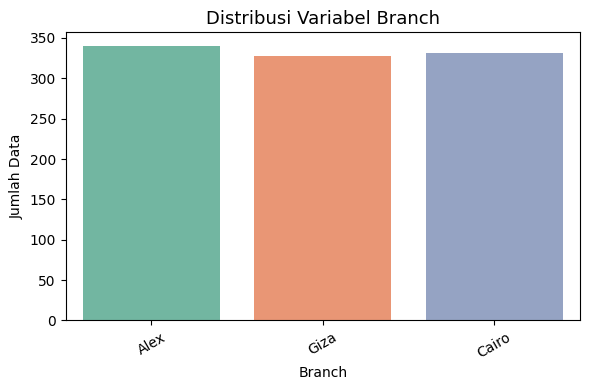

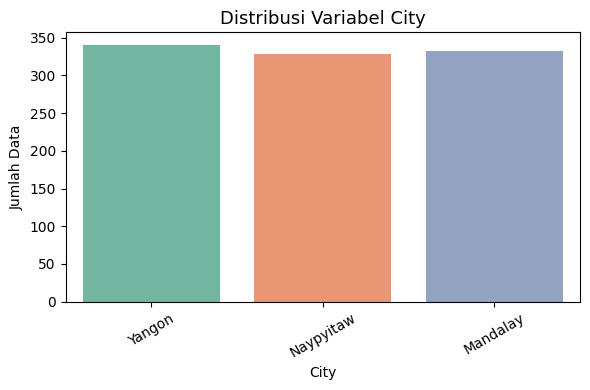

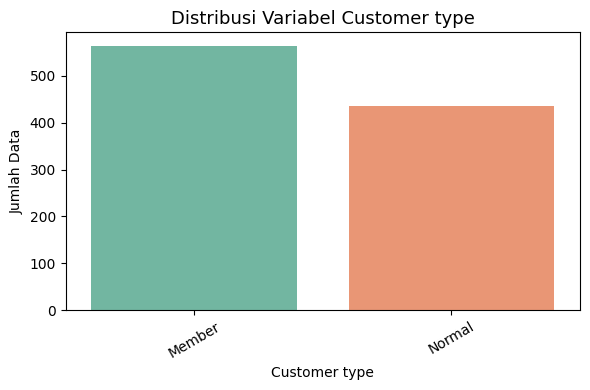

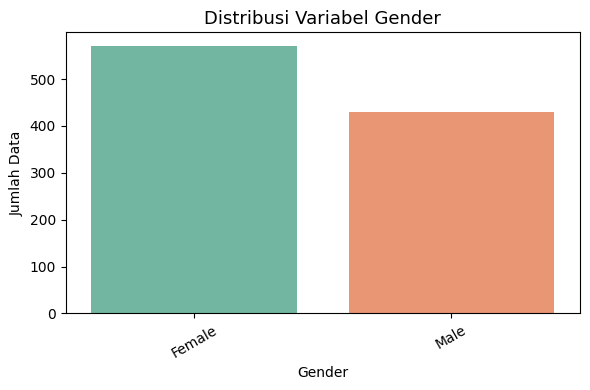

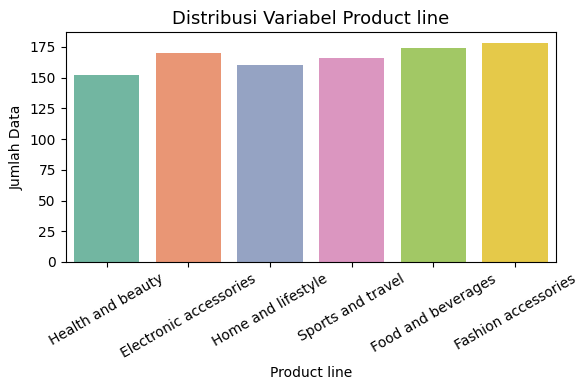

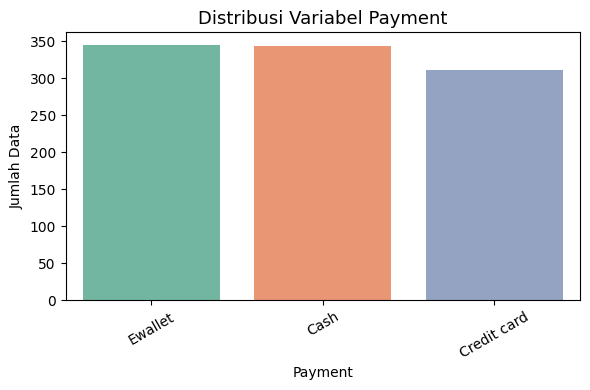

In [ ]:
# Daftar kolom kategorikal
cat_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

# Loop setiap variabel kategorikal
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=col, data=df, palette='Set2', legend=False)
    plt.title(f'Distribusi Variabel {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Jumlah Data')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Berdasarkan hasil visualisasi, data menunjukkan bahwa distribusi pada variabel *Branch* dan *City* relatif merata di antara ketiga cabang, yaitu Alex, Giza, dan Cairo. Sebagian besar pelanggan merupakan tipe *Member* dibandingkan *Normal*, serta jumlah pelanggan perempuan lebih banyak dibandingkan laki-laki. Distribusi produk pada variabel *Product line* juga terlihat cukup seimbang, dengan kategori *Fashion accessories* dan *Food and beverages* sedikit lebih dominan dibandingkan kategori lainnya. Selain itu, pada variabel *Payment*, metode pembayaran *Ewallet* dan *Cash* digunakan hampir dalam jumlah yang sama, dengan transaksi *Credit Card* sedikit lebih rendah dibanding keduanya.


###Handling Outlier

In [ ]:
# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Deteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)

        print(f" Kolom: {col}")
        print(f"   Jumlah outlier: {len(outliers)}")
        print(f"   Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}\n")

    return outlier_summary
# Jalankan fungsi
outlier_counts = detect_outliers_iqr(df, numeric_cols)

 Kolom: Unit price
   Jumlah outlier: 0
   Batas bawah: -34.72, Batas atas: 145.53

 Kolom: Quantity
   Jumlah outlier: 0
   Batas bawah: -4.50, Batas atas: 15.50

 Kolom: Tax 5%
   Jumlah outlier: 9
   Batas bawah: -18.86, Batas atas: 47.23

 Kolom: Sales
   Jumlah outlier: 9
   Batas bawah: -395.97, Batas atas: 991.74

 Kolom: cogs
   Jumlah outlier: 9
   Batas bawah: -377.11, Batas atas: 944.52

 Kolom: gross income
   Jumlah outlier: 9
   Batas bawah: -18.86, Batas atas: 47.23

 Kolom: Rating
   Jumlah outlier: 0
   Batas bawah: 1.00, Batas atas: 13.00



##### Berdasarkan hasil identifikasi outlier di atas, dapat disimpulkan bahwa mayoritas variabel memiliki sebaran data yang normal tanpa adanya nilai yang menyimpang jauh, kecuali pada beberapa variabel finansial. Kolom **Tax 5%**, **Sales**, **cogs**, dan **gross income** masing-masing terdeteksi memiliki **9 outlier**, yang menunjukkan adanya transaksi dengan nilai pajak, penjualan, dan keuntungan yang jauh lebih besar dibandingkan data lainnya. Kondisi ini dapat dianggap wajar karena keempat variabel tersebut saling berhubungan langsung dengan total nilai transaksi, sehingga variasi besar pada nominal tertentu dapat menghasilkan nilai ekstrem. Sementara itu, variabel **Unit price**, **Quantity**, dan **Rating** tidak menunjukkan adanya outlier, menandakan bahwa harga produk, jumlah pembelian, serta penilaian pelanggan relatif stabil dan berada dalam kisaran yang normal di seluruh dataset.

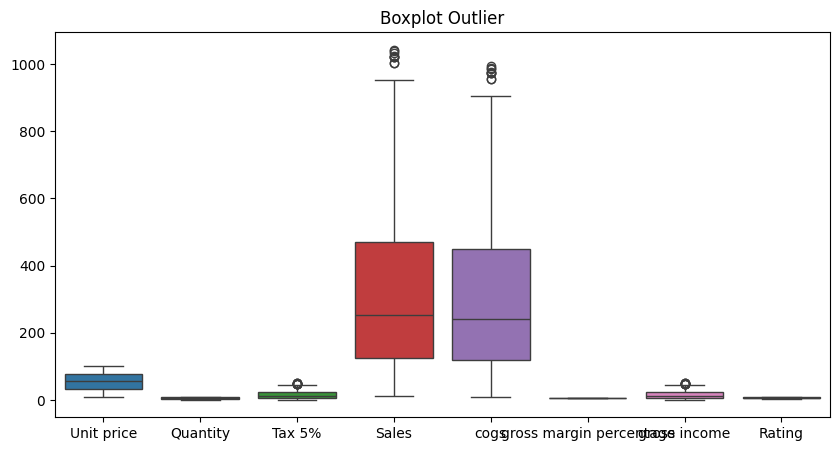

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot Outlier')
plt.show()

Berdasarkan hasil boxplot, terlihat bahwa variabel **Tax 5%**, **Sales**, **COGS**, dan **gross income** memiliki sejumlah **outlier**, masing-masing sebanyak 9 data. Sementara itu, variabel **Unit price**, **Quantity**, dan **Rating** tidak memiliki outlier. Hal ini menunjukkan bahwa sebagian besar data berada dalam rentang normal, namun terdapat beberapa nilai ekstrem pada variabel keuangan yang kemungkinan berasal dari transaksi dengan nilai penjualan yang sangat tinggi.


In [ ]:
#Handling Outlier dengan metode Winsorization (Capping IQR)
outlier_limits = {
    'Tax 5%': (-18.86, 47.23),
    'Sales': (-395.97, 991.74),
    'cogs': (-377.11, 944.52),
    'gross income': (-18.86, 47.23)
}

def winsorize(df, col, lower, upper):
    df[col] = df[col].clip(lower=lower, upper=upper)

for col, (lower, upper) in outlier_limits.items():
    winsorize(df, col, lower, upper)

print("Outlier ditangani menggunakan metode Winsorization (Capping IQR)")

Outlier ditangani menggunakan metode Winsorization (Capping IQR)


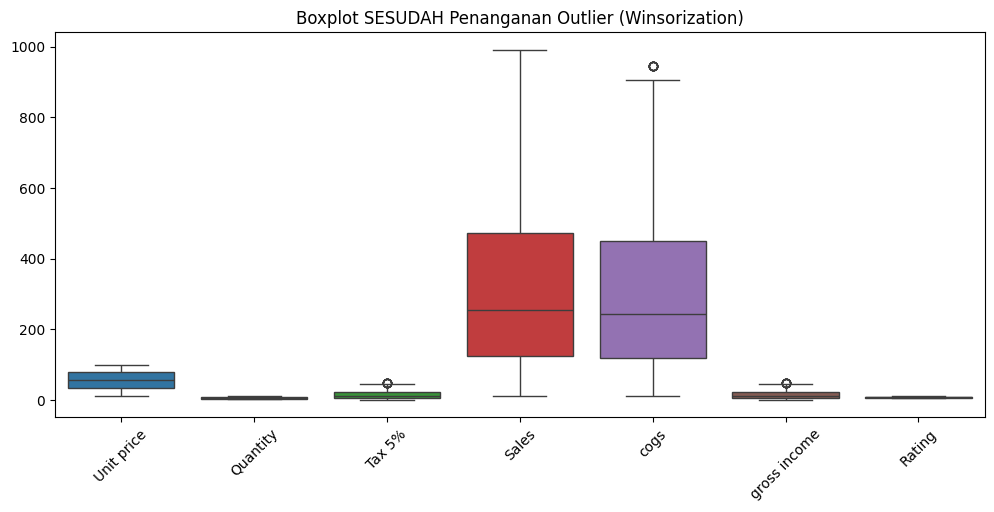

In [ ]:
#Boxplot Sesudah penanganan Outlier
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Unit price','Quantity','Tax 5%','Sales','cogs','gross income','Rating']])
plt.title("Boxplot SESUDAH Penanganan Outlier (Winsorization)")
plt.xticks(rotation=45)
plt.show()

Boxplot menunjukkan bahwa nilai ekstrem (outlier) telah berhasil dibatasi (capped) pada batas IQR, terutama terlihat pada variabel Sales dan cogs. Kedua variabel ini tetap menjadi yang paling dispersif (memiliki IQR terbesar) meskipun outlier-nya sudah diatasi. Sebaliknya, variabel seperti Quantity dan Rating menunjukkan dispersi yang sangat minimal, menandakan sebagian besar datanya terkonsentrasi di satu nilai rendah

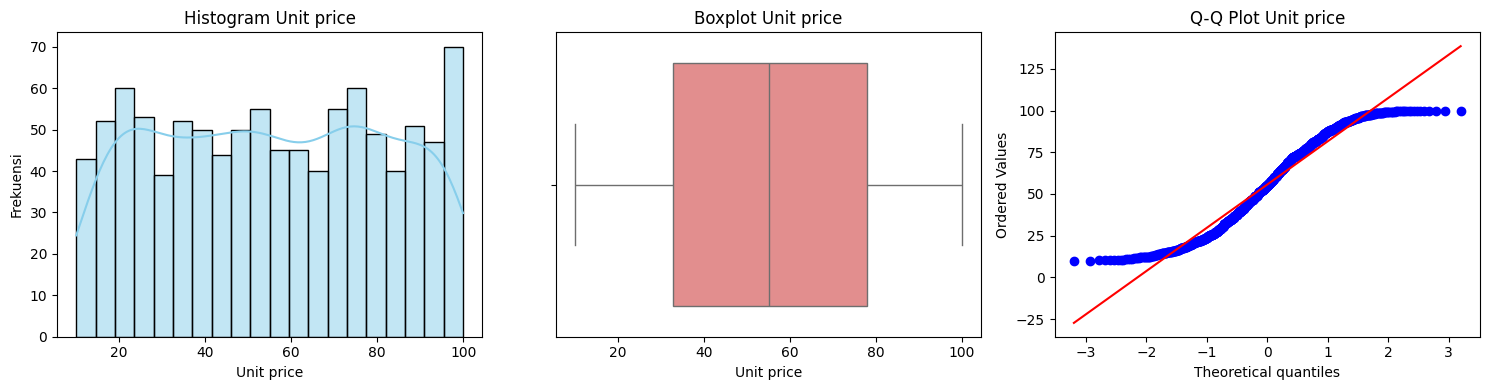

📊 Kolom: Unit price
   ➤ Skewness: 0.0071
   ➤ Shapiro-Wilk: Statistik = 0.9519, p-value = 0.0000 → Tidak Normal
----------------------------------------------------------------------


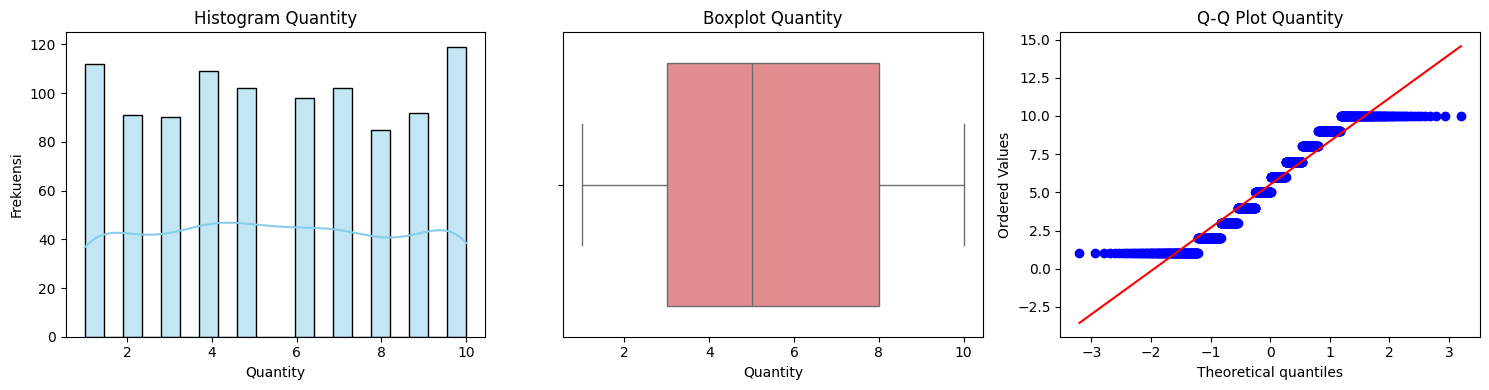

📊 Kolom: Quantity
   ➤ Skewness: 0.0129
   ➤ Shapiro-Wilk: Statistik = 0.9326, p-value = 0.0000 → Tidak Normal
----------------------------------------------------------------------


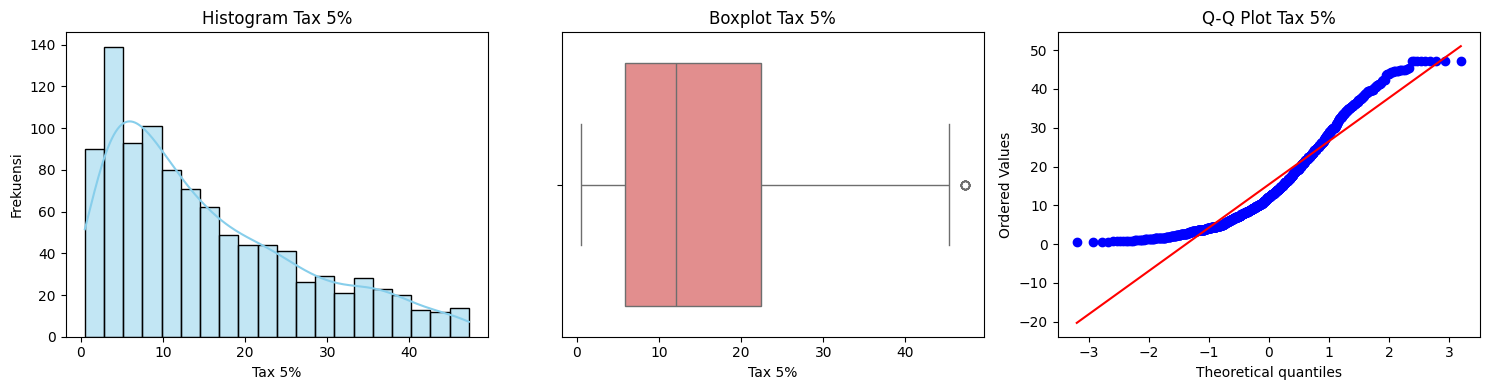

📊 Kolom: Tax 5%
   ➤ Skewness: 0.8773
   ➤ Shapiro-Wilk: Statistik = 0.9084, p-value = 0.0000 → Tidak Normal
----------------------------------------------------------------------


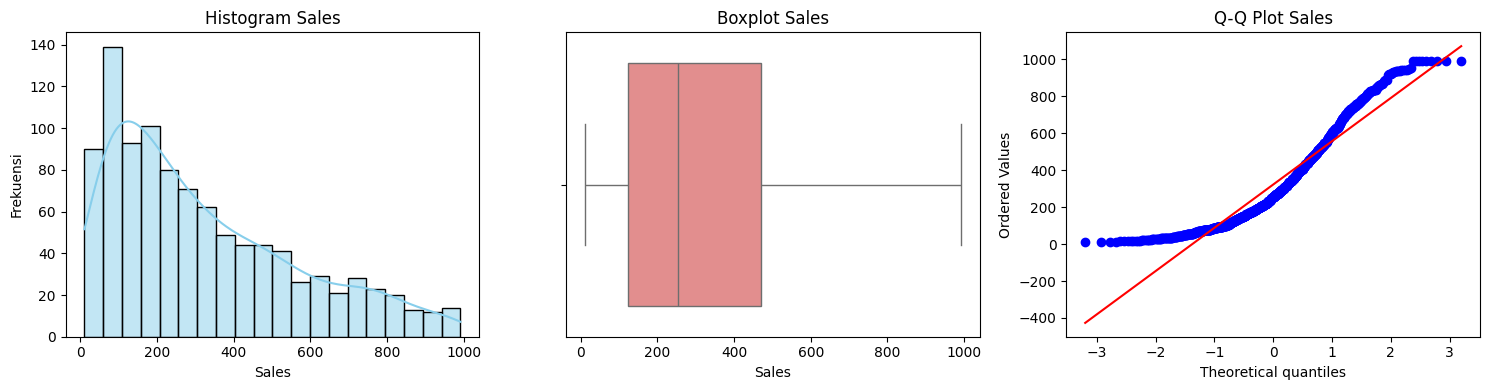

📊 Kolom: Sales
   ➤ Skewness: 0.8772
   ➤ Shapiro-Wilk: Statistik = 0.9084, p-value = 0.0000 → Tidak Normal
----------------------------------------------------------------------


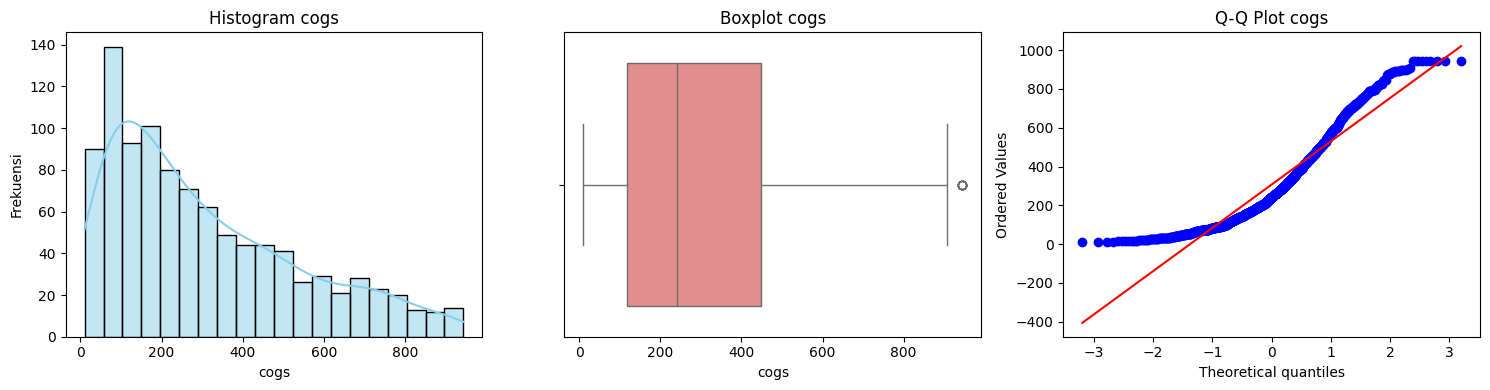

📊 Kolom: cogs
   ➤ Skewness: 0.8772
   ➤ Shapiro-Wilk: Statistik = 0.9084, p-value = 0.0000 → Tidak Normal
----------------------------------------------------------------------


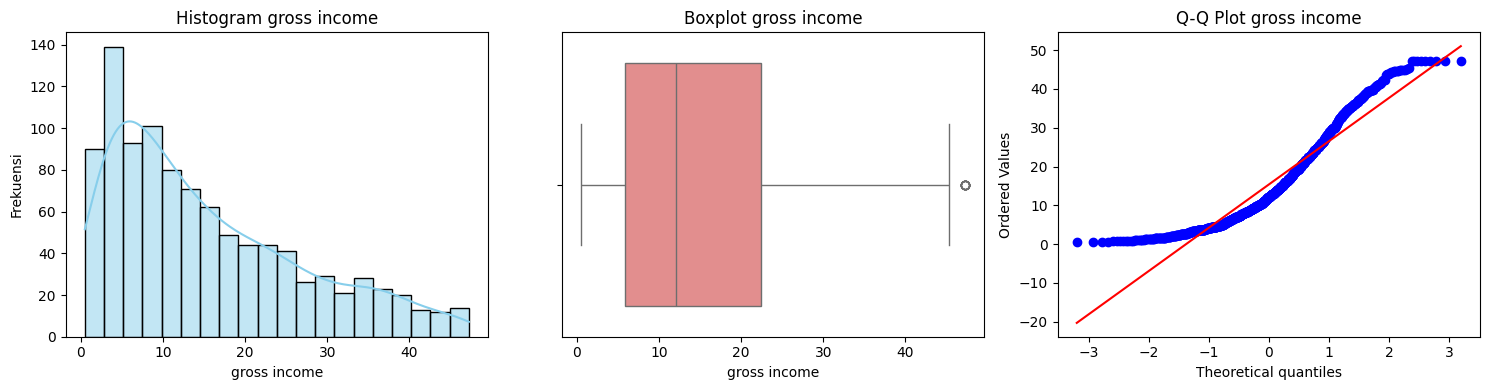

📊 Kolom: gross income
   ➤ Skewness: 0.8773
   ➤ Shapiro-Wilk: Statistik = 0.9084, p-value = 0.0000 → Tidak Normal
----------------------------------------------------------------------


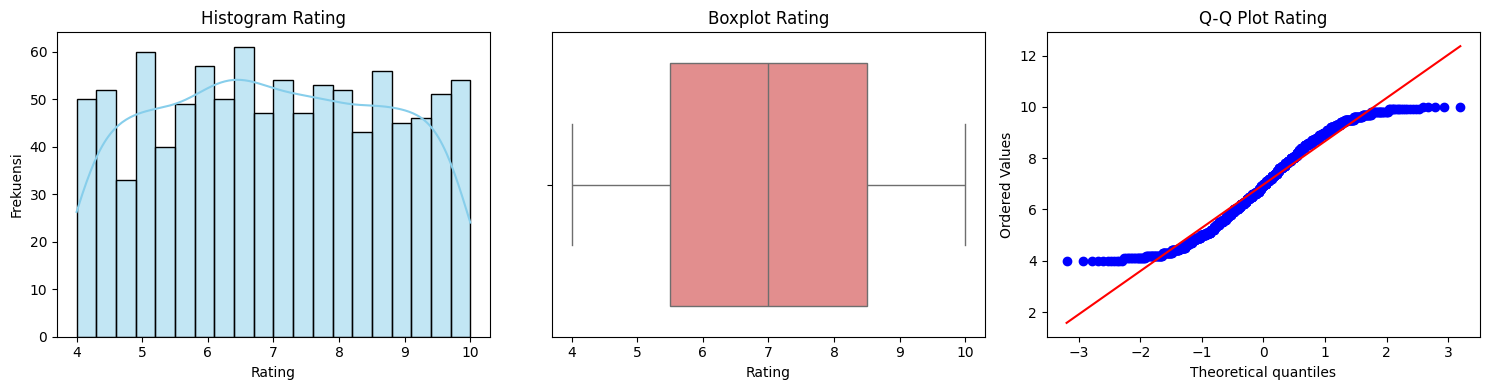

📊 Kolom: Rating
   ➤ Skewness: 0.0090
   ➤ Shapiro-Wilk: Statistik = 0.9582, p-value = 0.0000 → Tidak Normal
----------------------------------------------------------------------


In [ ]:
# Loop untuk setiap kolom numerik
for col in num_cols:
    plt.figure(figsize=(15, 4))

    # ===== 1. Histogram =====
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # ===== 2. Boxplot =====
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)

    # ===== 3. Q-Q Plot =====
    plt.subplot(1, 3, 3)
    probplot(df[col].dropna(), dist='norm', plot=plt)
    plt.title(f'Q-Q Plot {col}')

    plt.tight_layout()
    plt.show()

    # ===== Statistik Deskriptif =====
    skew_val = df[col].skew()
    stat, p = shapiro(df[col].dropna())
    normal = "Normal" if p > 0.05 else "Tidak Normal"

    print(f"📊 Kolom: {col}")
    print(f"   ➤ Skewness: {skew_val:.4f}")
    print(f"   ➤ Shapiro-Wilk: Statistik = {stat:.4f}, p-value = {p:.4f} → {normal}")
    print("-" * 70)

##### > Tidak Normalitas (Uji Shapiro-Wilk):
Nilai p-value untuk semua kolom adalah 0.0000, yang jauh lebih kecil dari tingkat signifikansi alpha(misalnya, 0.05). Oleh karena itu, hipotesis nol (data terdistribusi normal) ditolak untuk semua variabel. Hal ini harusnya dikonfirmasi oleh QQ Plot yang menunjukkan penyimpangan signifikan dari garis lurus, dan Histogram yang tidak berbentuk lonceng sempurna.
##### > Skewness:
- Unit price, Quantity, Rating: Nilai Skewness sangat mendekati 0 (0.0071, 0.0129, 0.0090). Secara visual (pada Histogram), kolom-kolom ini cenderung simetris. Meskipun simetris, uji Shapiro-Wilk menunjukkan mereka tidak normal (kemungkinan karena kurtosis atau ukuran sampel besar yang membuat uji ini sangat sensitif).Tax 5%, Sales, cogs, gross income: Nilai Skewness positif (sekitar 0.877). Ini mengindikasikan distribusi condong ke kanan (positively skewed). Secara visual, Histogram untuk kolom-kolom ini kemungkinan menunjukkan ekor yang memanjang ke arah nilai positif/tinggi.

# Analisis Korelasi

In [ ]:
num_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross income', 'Rating']
df_num = df[num_cols]

# Hitung korelasi (Pearson)
corr_matrix = df_num.corr(method='pearson')

# matriks korelasi
print("Matriks Korelasi (Pearson):")
corr_matrix

Matriks Korelasi (Pearson):


,Unit price,Quantity,Tax 5%,Sales,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.634169,0.634170,0.634170,0.634169,-0.008778
Quantity,0.010778,1.000000,0.706023,0.706024,0.706024,0.706023,-0.015815
Tax 5%,0.634169,0.706023,1.000000,1.000000,1.000000,1.000000,-0.036214
Sales,0.634170,0.706024,1.000000,1.000000,1.000000,1.000000,-0.036213
cogs,0.634170,0.706024,1.000000,1.000000,1.000000,1.000000,-0.036213
gross income,0.634169,0.706023,1.000000,1.000000,1.000000,1.000000,-0.036214
Rating,-0.008778,-0.015815,-0.036214,-0.036213,-0.036213,-0.036214,1.000000


##### Dari hasil matriks korelasi Pearson di atas, dapat diketahui bahwa variabel **Tax 5%**, **Sales**, **cogs**, dan **gross income** menunjukkan hubungan yang sangat kuat dan positif (nilai korelasi mendekati 1). Artinya, peningkatan pada salah satu variabel tersebut akan diikuti oleh kenaikan pada variabel lainnya, yang logis karena semuanya berhubungan langsung dengan nilai transaksi penjualan. Sementara itu, **Quantity** memiliki korelasi positif sedang dengan variabel-variabel keuangan (sekitar 0,70), yang mengindikasikan bahwa semakin banyak produk yang terjual, semakin tinggi pula nilai pajak, penjualan, dan laba, meskipun tidak sekuat hubungan antarvariabel keuangan. **Unit price** juga memperlihatkan korelasi positif yang cukup kuat (sekitar 0,63) terhadap nilai penjualan, menandakan bahwa peningkatan harga per unit berkontribusi terhadap naiknya total penjualan. Sebaliknya, **Rating** memiliki korelasi sangat lemah dan bernilai negatif terhadap variabel numerik lainnya (sekitar -0,03 hingga -0,01), menunjukkan bahwa penilaian pelanggan hampir tidak berhubungan dengan harga, jumlah produk yang dibeli, maupun nilai pendapatan.


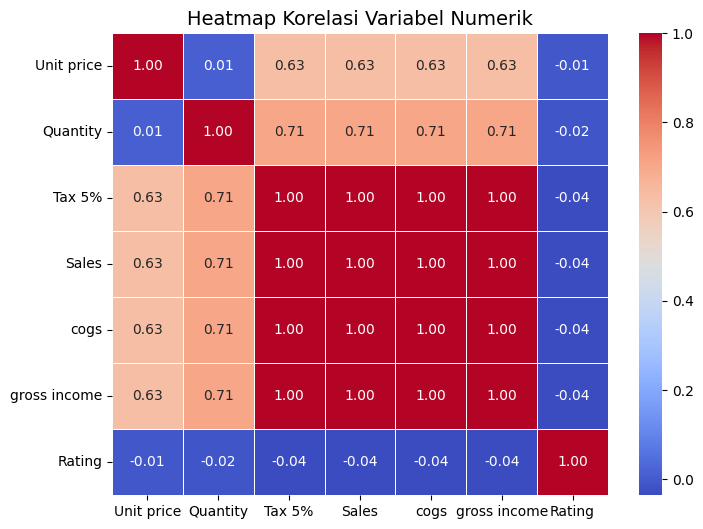

In [ ]:
# Visualisasi Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel Numerik", fontsize=14)
plt.show()

Berdasarkan hasil heatmap korelasi variabel numerik di atas, terlihat bahwa terdapat hubungan yang cukup kuat di antara beberapa variabel, terutama yang berkaitan dengan transaksi penjualan. Variabel Tax 5%, Sales, COGS (Cost of Goods Sold), dan Gross Income memiliki nilai korelasi yang sangat tinggi, yaitu 1.00, menandakan bahwa keempat variabel tersebut berhubungan secara sempurna dan searah. Hal ini logis karena keempatnya saling terkait dalam perhitungan transaksi Sales berasal dari hasil penjualan, cogs adalah biaya pokoknya, Tax 5% adalah pajak yang dihitung dari Sales, dan Gross Income merupakan laba kotor yang juga bergantung pada nilai penjualan dan pajak.

Selain itu, variabel Quantity juga memiliki korelasi yang cukup tinggi dengan kelompok tersebut, yaitu sekitar 0.71, menunjukkan bahwa semakin banyak jumlah barang yang terjual, maka nilai Sales, cogs, Gross Income, dan Tax 5% juga cenderung meningkat. Variabel Unit Price memiliki korelasi sedang dengan nilai sekitar 0.63 terhadap variabel-variabel tersebut, yang artinya harga satuan barang juga turut memengaruhi total penjualan, pajak, dan pendapatan, namun tidak sekuat pengaruh jumlah barang yang terjual.

Sementara itu, variabel Rating hampir tidak memiliki korelasi dengan variabel numerik lainnya, dengan nilai korelasi berkisar antara -0.01 hingga -0.04. Ini berarti tingkat kepuasan pelanggan (*Rating*) tidak memiliki hubungan yang signifikan dengan harga, jumlah barang, atau besarnya nilai transaksi.

In [ ]:
# Urutan korelasi terhadap variabel target
target = 'Sales'
corr_target = corr_matrix[target].sort_values(ascending=False)
print(f"\nKorelasi terhadap variabel target '{target}':\n")
print(corr_target)


Korelasi terhadap variabel target 'Sales':

Sales           1.000000
cogs            1.000000
Tax 5%          1.000000
gross income    1.000000
Quantity        0.706024
Unit price      0.634170
Rating         -0.036213
Name: Sales, dtype: float64


##### Hasil korelasi terhadap variabel target **Sales** menunjukkan bahwa **cogs**, **Tax 5%**, dan **gross income** memiliki korelasi sempurna (1.000000), yang menandakan adanya hubungan linier yang sangat kuat karena ketiganya merupakan bagian langsung dari perhitungan nilai penjualan. Variabel **Quantity** juga memperlihatkan korelasi positif yang tinggi (0.71), mengindikasikan bahwa peningkatan jumlah barang yang terjual berbanding lurus dengan kenaikan total penjualan. Sementara itu, **Unit price** memiliki korelasi positif sedang (0.63), sehingga harga per unit juga memberikan pengaruh terhadap besarnya nilai penjualan. Di sisi lain, **Rating** menunjukkan korelasi negatif yang sangat lemah (-0.04), yang berarti penilaian pelanggan hampir tidak memiliki dampak terhadap total penjualan

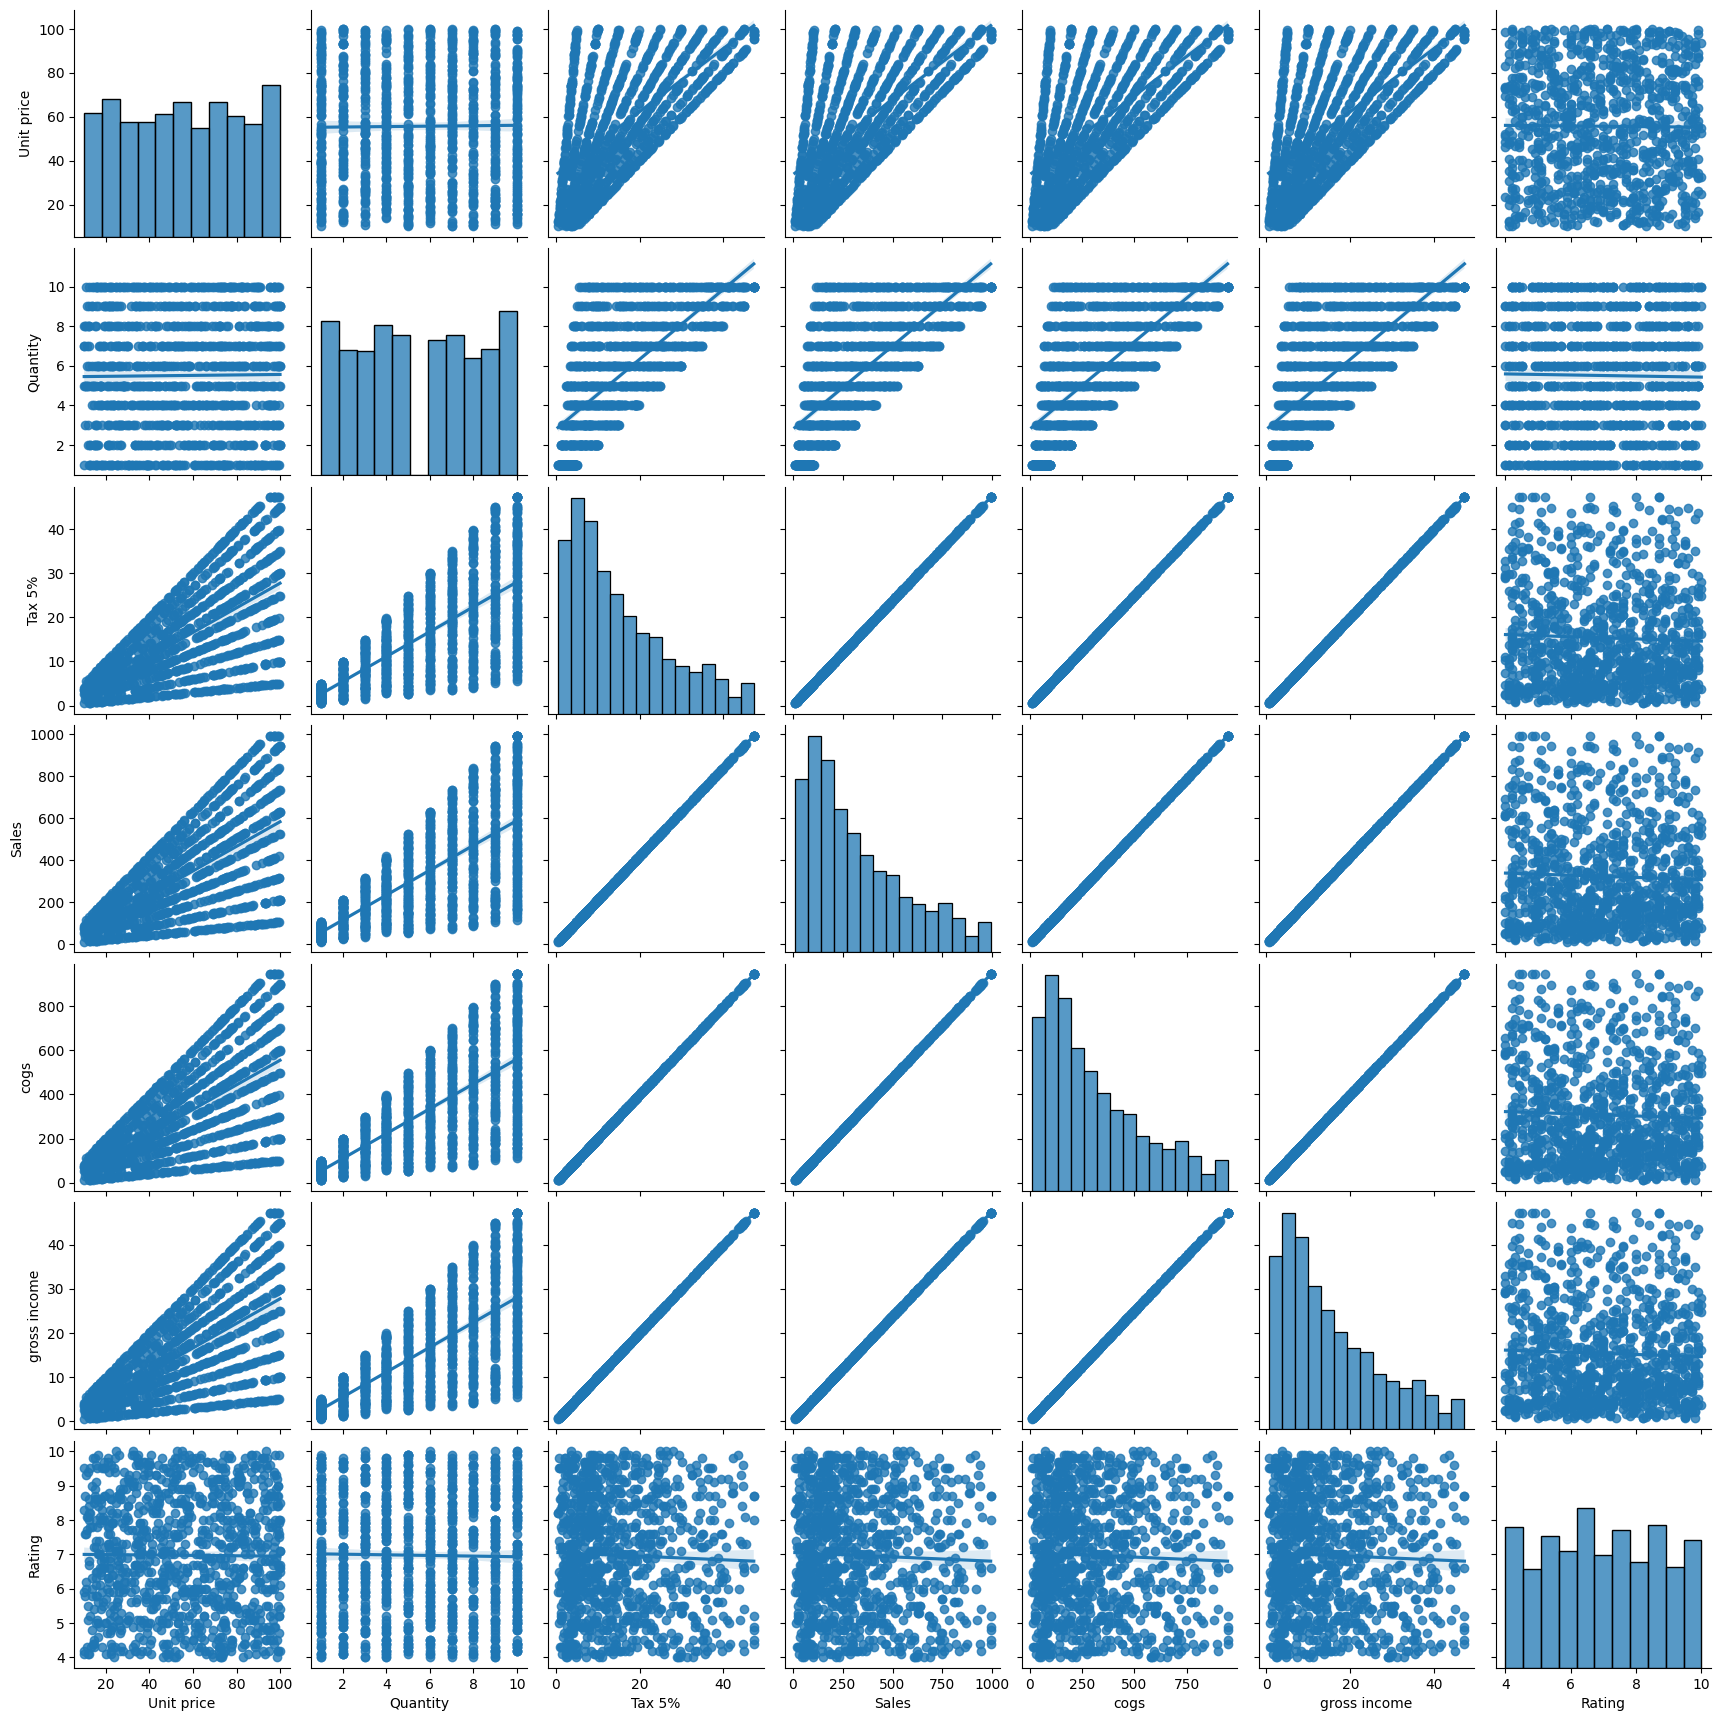

In [ ]:
sns.pairplot(df_num , vars=df_num, kind='reg')
plt.show()

1. Distribusi Individual (Diagonal)
Histogram pada diagonal menunjukkan distribusi individual variabel.

- Unit price, Quantity, Rating: Cenderung memiliki distribusi yang relatif seragam atau berblok-blok (discrete/uniform), bukan terdistribusi normal.

- Tax 5%, Sales, cogs, gross income: Menunjukkan distribusi yang jelas condong ke kanan (positively skewed), dengan sebagian besar nilai terkonsentrasi di rentang bawah.

2. Hubungan Antar Variabel (Scatter Plots)
Korelasi Sempurna/Sangat Kuat: Terdapat korelasi linier positif sempurna antara:

- Tax 5%, Sales, cogs, dan gross income. Ini menunjukkan bahwa variabel-variabel ini saling terkait secara definisi (misalnya, Tax 5% dan gross income dihitung berdasarkan Sales/cogs) dan bergerak bersama-sama.

- Korelasi Moderat: Terdapat hubungan linier positif yang kuat antara Unit price dan Quantity dengan kelompok variabel keuangan lainnya (Tax 5%, Sales, cogs, gross income). Peningkatan harga dan kuantitas jelas meningkatkan variabel keuangan.

- Tidak Ada Korelasi: Variabel Rating menunjukkan tidak ada hubungan linier yang jelas dengan variabel lain mana pun; scatter plot-nya terlihat seperti awan titik yang tersebar acak atau berblok-blok, menunjukkan rating tidak dipengaruhi atau tidak memengaruhi harga, kuantitas, atau variabel keuangan secara linier.

In [ ]:
# Membuat kategori harga berdasarkan kuartil
df['Kategori_Harga'] = pd.qcut(df['Unit price'],
                               q=4,
                               labels=['Murah', 'Sedang', 'Mahal', 'Sangat Mahal'])

# Cek beberapa data untuk melihat hasilnya
print(df[['Unit price', 'Kategori_Harga']].head())

# Lihat jumlah data di setiap kategori
print("Distribusi kategori harga berdasarkan kuartil:")
print(df['Kategori_Harga'].value_counts())

# (Opsional) Lihat batas tiap kuartil
print("Batas kuartil Unit price:")
df['Unit price'].quantile([0.25, 0.5, 0.75]))


   Unit price Kategori_Harga
0       74.69          Mahal
1       15.28          Murah
2       46.33         Sedang
3       58.22          Mahal
4       86.31   Sangat Mahal

Distribusi kategori harga berdasarkan kuartil:
Kategori_Harga
Murah           250
Sedang          250
Mahal           250
Sangat Mahal    250
Name: count, dtype: int64

Batas kuartil Unit price:
0.25    32.875
0.50    55.230
0.75    77.935
Name: Unit price, dtype: float64


##### Berdasarkan hasil analisis kuartil pada variabel **Unit price**, nilai harga produk dibagi menjadi empat kategori dengan distribusi yang seimbang, masing-masing berjumlah 250 data. Rentang harga dikelompokkan berdasarkan kuartil sebagai berikut: produk dengan harga di bawah **32.875** termasuk kategori **Murah**, antara **32.875–55.230** dikategorikan **Sedang**, antara **55.230–77.935** tergolong **Mahal**, dan di atas **77.935** masuk kategori **Sangat Mahal**. Pembagian ini menunjukkan bahwa distribusi harga produk relatif merata di keempat kelompok tersebut, sehingga analisis selanjutnya dapat dilakukan secara seimbang untuk setiap segmen harga.

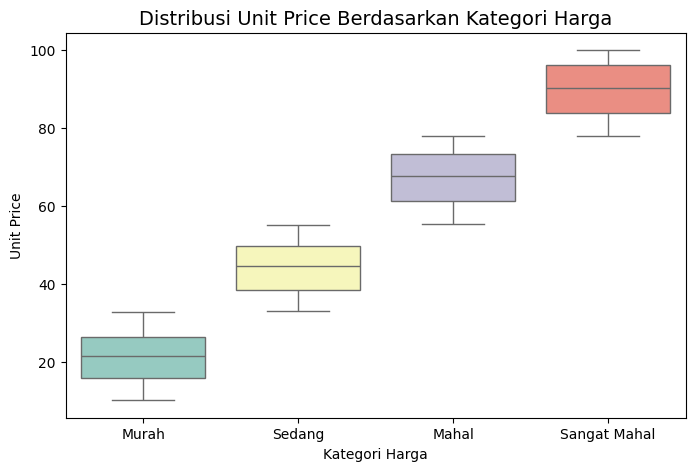

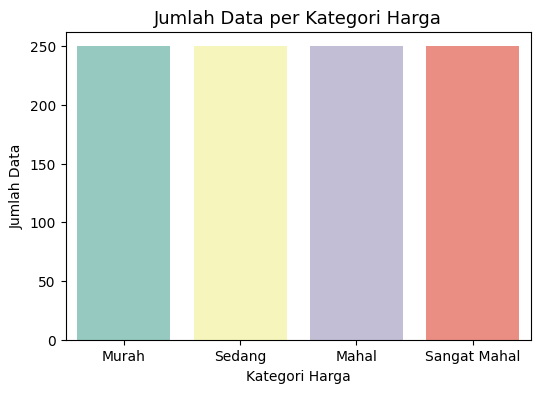


Statistik deskriptif per kategori harga:
                count      mean       std    min      25%     50%      75%  \
Kategori_Harga                                                               
Murah           250.0  21.27820  6.261637  10.08  15.8250  21.560  26.2525   
Sedang          250.0  44.11132  6.585212  32.90  38.4875  44.465  49.7150   
Mahal           250.0  67.23904  6.742480  55.39  61.3200  67.610  73.2500   
Sangat Mahal    250.0  90.05996  6.693253  77.95  83.8475  90.230  96.1475   

                  max  
Kategori_Harga         
Murah           32.80  
Sedang          55.07  
Mahal           77.93  
Sangat Mahal    99.96  


In [ ]:
# Visualisasi distribusi Unit price per kategori
plt.figure(figsize=(8, 5))
sns.boxplot(x='Kategori_Harga', y='Unit price', hue='Kategori_Harga',
            data=df, palette='Set3', legend=False)
plt.title('Distribusi Unit Price Berdasarkan Kategori Harga', fontsize=14)
plt.xlabel('Kategori Harga')
plt.ylabel('Unit Price')
plt.show()

# Visualisasi jumlah data tiap kategori
plt.figure(figsize=(6, 4))
sns.countplot(x='Kategori_Harga', hue='Kategori_Harga', data=df, palette='Set3', legend=False)
plt.title('Jumlah Data per Kategori Harga', fontsize=13)
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Data')
plt.show()

# Statistik tiap kategori
print("\nStatistik deskriptif per kategori harga:")
print(df.groupby('Kategori_Harga', observed=False)['Unit price'].describe())


##### Data menunjukkan bahwa setiap kategori harga  Murah, Sedang, Mahal, dan Sangat Mahal  memiliki jumlah data yang sama (masing-masing 250). Nilai rata-rata dan maksimum meningkat secara konsisten dari kategori murah hingga sangat mahal, menandakan pengelompokan harga dilakukan dengan baik dan teratur. Boxplot juga memperlihatkan bahwa tiap kategori memiliki rentang harga yang jelas dan tidak saling tumpang tindih. Secara keseluruhan, data harga terdistribusi seimbang dan representatif untuk analisis lebih lanjut.